# Classification Analysis Performance Assessment

### John Foster
### Department of Information Technology, Western Governors University
### D209: Data Mining I
### Professor Festus Elleh
### May 12, 2023

### A1: PROPOSAL OF QUESTION

The research question I have decided to pursue using the Churn dataset is as follows: “With what degree of accuracy can we utilize a K-Nearest Neighbor (KNN) classification model to predict a customer’s decision to discontinue service in a given month?” This research question seeks to approach a churn analysis from a different angle: while I utilized logistic regression in D208 to determine what independent variables demonstrated the most significant statistical relationships with the Churn feature, my primary metric for success in this analysis is a higher accuracy calculation compared to that of my past logistic regression analysis. If the accuracy of the resulting model is high enough, the organization could generate predictions of customers most likely to churn in a given month, and take proactive steps to retain them such as targeted marketing offers and incentives.

### A2: DEFINED GOAL

My primary goal in this analysis is to develop a KNN classification model that outperforms the accuracy calculation of the logistic regression model that I developed in D208. For reference, the final accuracy calculation of that model was 86.97%. Regardless of whether or not our KNN model actually clears that value, the existing benchmark of my logistic regression allows me to have some expectation of the demonstrable predictive accuracy for the Churn variable in classification models, which will allow me to tune and debug my KNN model until its results are at least commensurate with my prior knowledge of this dataset. This will allow me to apply my completed KNN classifier framework to other research questions related to this dataset as necessary.

### B1: EXPLANATION OF PREDICTION METHOD

A KNN classifier makes its classifications by taking an input observation (row) and evaluating the values of its specified features against other observations in the dataset. It looks for observations that are as close to the input value as possible across all included variables by calculating the Euclidean distance between the observations. This allows it to evaluate across all variables selected for use in the analysis. The KNN evaluates “k” number of nearest neighbors (the optimal value of which is found using a grid search) for the target variable class exhibited most often, thereby returning a prediction of the occurring class in the input observation (Bruce et al., 2020, p. 238-9). The model then compares the predicted class to the actual class exhibited by the observation in the dataset to determine if it was correct. This process occurs iteratively and its results are ultimately used to determine metrics such as accuracy score.

Because we have already developed a fairly accurate logistic regression model for the Churn variable in D208, it is reasonable to expect that alternative classification models will yield similar results despite their different methods. With that in mind, I developed the KNN classifier expecting to meet or exceed the accuracy score of my logistic regression model, which was 86.97%.


### B2: SUMMARY OF METHOD ASSUMPTION

One assumption of a KNN classifier model is that all data used is expressed numerically. At first glance, this appears to be a contradiction of what a classifier actually does; if we are attempting to predict the class of a categorical variable, then how can all our data be numeric? However, if we reexpress our categorical features numerically, we can still effectively use KNN to classify categorical data, and to utilize the classes of categorical features to find nearest neighbors in order to make those classifications accurately.

### B3: PACKAGES OR LIBRARIES LIST

We have chosen to use several Python libraries in our assessment, and each serve very important functions. We will now list the libraries as well as any specific modules and briefly describe how they are used in our analysis.

-Pandas: Our primary dataframe generation and manipulation toolset. We use Pandas to generate dataframe objects from our source .csv file, instantiate other dataframe objects to process and rearrange data, and export our prepared datasets to .csv files.

-Numpy: A robust toolset of optimized mathematical functions. We use Numpy in this analysis to round floating point decimals, calculate the square root of the length of our dataset to optimize our grid search, and return a series of evenly-spaced numbers from a start and stop point to programmatically generate the arguments of our grid search using the .arange function.

-Sklearn: A well-supported and thoroughly documented toolset for various predictive models and analytics tasks related thereto. We utilize multiple modules from this larger library, which we will list below.
<br>	.preprocessing: Used for encoding our categorical data and scaling all numeric data to prepare it for processing in the KNN classifier.
<br>	.feature_selection: Used for analyzing and selecting the features from our dataset for use in the KNN classifier. Primarily uses ANOVA and f-scores for feature selection in this analysis.
<br>	.neighbors: The core KNN classifier model used in our analysis. Called in code as  “.KNeighborsClassifier”. Also contains a method to return its accuracy score, which is the primary metric used to compare our model to the logistic regression model built in D208.
<br>	.model_selection: Used for splitting our dataset into training and testing subsets for accuracy validation and the grid search functionality for finding the optimal value of “k”.
<br>	.metrics: Primarily used for visualizing and conveying the performance results of the model. Includes functionality for our confusion matrix, a classification report to better understand the information conveyed by the confusion matrix, receiver operating characteristic (ROC) curve functions, and area under curve (AUC) calculation.

-Scipy: Well-supported collection of algorithms for scientific computation.
<br>	.stats: Used primarily for calculating z_scores to treat for outliers.

-Matplotlib: Industry standard python data visualization library.
<br>	.pyplot: Used for displaying our confusion matrix and ROC curve.


### C1: DATA PREPROCESSING

One of the primary data preprocessing goals that will enable us to utilize a KNN classifier model is the normalization of our numerically-expressible data. After we have encoded all of our categorical features as as numeric values, we will iterate through every feature of the dataset and scale the data using the .MinMaxScaler function from the sklearn.preprocessing module so that the values of every feature range from 0 to 1. This will enable the KNN classifier to calculate Euclidean distances between observations using the values of every selected feature without accidentally skewing one feature to have a higher or lower impact on the calculated distance.

### C2: DATASET VARIABLES

#### I wanted to prioritize programmatic feature selection in this analysis, so we will be initially including every feature in the dataset that can be feasibly used, with the understanding that some will be filtered during our feature selection step via sklearn's SelectKBest() method. There are also multiple features that were not appropriate to include initially for various reasons. The features that were initially included in the analysis are as follows:

Lat: Continuous.

Lng: Continuous.

Population: Continuous.

Area: Categorical.

Children: Continuous.

Age: Continuous.

Income: Continuous.

Marital: Categorical.

Gender: Categorical.

Outage_sec_perweek: Continuous.

Email: Continuous.

Contacts: Continuous.

Yearly_equip_failure: Continuous.

Techie: Categorical.

Contract: Categorical.

Port_modem: Categorical.

Tablet: Categorical.

InternetService: Categorical.

Phone: Categorical.

Multiple: Categorical.

OnlineSecurity: Categorical.

OnlineBackup: Categorical.

DeviceProtection: Categorical.

TechSupport: Categorical.

StreamingTV: Categorical.

StreamingMovies: Categorical.

PaperlessBilling: Categorical.

PaymentMethod: Categorical.

Tenure: Continuous.

MonthlyCharge: Continuous.

Bandwidth_GB_Year: Continuous.

Item1: Categorical. Expressed natively as an integer, but is a survey response.

Item2: Categorical. Expressed natively as an integer, but is a survey response.

Item3: Categorical. Expressed natively as an integer, but is a survey response.

Item4: Categorical. Expressed natively as an integer, but is a survey response.

Item5: Categorical. Expressed natively as an integer, but is a survey response.

Item6: Categorical. Expressed natively as an integer, but is a survey response.

Item7: Categorical. Expressed natively as an integer, but is a survey response.

Item8: Categorical. Expressed natively as an integer, but is a survey response.

Churn: Categorical.

#### The following features were excluded from our analysis:

CaseOrder: Continuous variable used as an index to preserve the order of  the original dataset. Irrelevant to our analysis.

Customer_id: Unique categorical variable representing each customer in the dataset. Inappropriate to encode because its values are unique.

Interaction: Unique categorical variable representing interactions between the customer and organization. Inappropriate to encode because its values are unique.

UID: Unique categorical variable representing interactions between the customer and organization. Inappropriate to encode because its values are unique.

City: Categorical variable representing the city in which the customer lives. Inappropriate to encode due to the number of unique values.

State: Categorical variable representing the state in which the customer lives. Inappropriate to encode due to the number of unique values.

County: Categorical variable representing the county in which the customer lives. Inappropriate to encode due to the number of unique values.

Zip: Categorical variable representing the postal code in which the customer lives. Inappropriate to encode due to the number of unique values. Expressed as an integer, but should be considered categorical.

Job: Categorical variable representing the customer’s vocation. Inappropriate to encode due to the number of unique values. 

TimeZone: Categorical variable representing the customer’s timezone. Inappropriate to use because lines of timezone are not standardized or equidistant in the same way as longitude, but an inaccurate and inferior analogue.


### C3: STEPS FOR ANALYSIS

Our data cleaning goals will be fairly minimal for this dataset. We will briefly check for duplicates and nullity, and drop any rows we find using those criteria. Next, we will median impute all outliers that are detected utilizing z-scores.

Our second objective in preparing our data for analysis is re-expressing our categorical features numerically. Categorical variables must be encoded into numeric values so that they can be evaluated with the rest of the data mathematically. After this is accomplished, we must standardize the numeric scale of each feature. In the case of numeric variables, this is accomplished programmatically using a scaling algorithm such as sklearn’s MinMaxScaler function. This re-expresses the numeric values between 0 and 1. For our encoded categorical variables, we can functionally ignore those encoded nominally (using one hot encoding), as their values will be either 0 or 1 by default. However, our ordinally encoded features should then also be scaled along with our natively numeric data so that they observe the same numeric scale. 

With the features scaled, our final task in preparing the data before it is ready to be exported or analyzed is feature selection. In our analysis, the SelectKBest algorithm uses an f_regression test for each feature against Churn to yield a p-value, which we can then use to filter our variables so that no features remain with an p-value greater than .05. This will minimize the chances of overfitting and ensuring that our features are all statistically significant in their relationship with Churn.

Once we have our final list of features, we will be ready to split the dataset into training and testing partitions, and export the prepared datasets. This also serves as a natural breakpoint in the analysis, because it allows us to compare different model implementations on the same prepared and imported dataset in other scripts, if we so chose.

To preserve the continuity of the notebook file, we will briefly summarize our steps for data preprocessing in markdown cells throughout the code that executes those steps.

#### First, we will import all of our necessary libraries.

In [235]:
#Import the libraries that we need for our analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import scipy.stats as stats

#### We import our base dataframe from the provided .csv file and make a copy.

In [236]:
#Import the churn dataset from the source csv file and make a dataframe out of it.
raw_df = pd.read_csv('churn_clean.csv')

#Make a copy of the imported dataframe in case we would like to inspect or manipulate the raw data. 
df = raw_df.copy()
#Create a list of all column names in the dataframe
df_cols = df.columns.to_list()

#### Now we can detect and treat duplicates.

In [237]:
#Drop any duplicate rows from the dataframe
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
#Check for duplicates using assertion statements on columns purported to contain unique values.
#This is a more in-depth approach to ensure that no duplicates remain.
assert df['Customer_id'].duplicated().all() == False
assert df['Interaction'].duplicated().all() == False

False    10000
dtype: int64


#### Next, we will detect and treat any null values.

In [238]:
#Make a list out of the names of the columns that have missing data.
missing_cols = df.columns[df.isnull().any()].to_list()
print(missing_cols)
#Drop any rows containing nullity
df.dropna(how='all')
assert len(missing_cols) == 0

[]


#### Now we will detect and median impute all of our outliers in the numeric columns. We will accomplish this by generating and filtering for z-scores.

In [239]:
#Make a list out of the numeric columns
num_cols = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

#Make a new dataframe to hold all of our z scores.
zscore_df = df.copy(deep=True)

#Get the z scores for values in numeric columns in zscore_df.
for col in zscore_df:
    if col in num_cols:
        zscore_df[col] = stats.zscore(df[col])

#Median impute all outliers in our numeric columns
for col in num_cols:
    df.loc[np.logical_or(zscore_df[col]>3,  zscore_df[col]<-3), col] = df[col].median()

#### We can now define which variables will be used in our analysis.

In [240]:
#Define our independent variables and dependent variable for initial regression.
X_cols = df.columns.tolist()
print(X_cols)

Y_col = X_cols.pop(X_cols.index('Churn'))

#These columns are inappropriate because they contain too many unique values to process or encode
bad_cols = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Job']
#TimeZone is analogous and inferior to longitude ('Lng'), and has inconsistent formatting
bad_cols.append('TimeZone')

#Remove our bad columns
for col in bad_cols:
    X_cols.pop(X_cols.index(col))

print(X_cols)
print(Y_col)

['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure'

#### We can construct our base dataframe. Our encoded columns will be rolled into this after encoding is complete.

In [241]:
#Make a new dataframe out of X_cols and add Y_col to it.
#This will conclude our data cleaning.
XY_cols = []
XY_cols.extend(X_cols)
XY_cols.append(Y_col)
print(X_cols)
print(Y_col)
print(XY_cols)
XY_df = pd.DataFrame()
for col in XY_cols:
    XY_df[col] = df[col]
print(XY_df.info())

['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
Churn
['Lat', 'Lng', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'It

#### To encode, we must first decide which categorical features will be encoded ordinally, and which will be encoded nominally via one-hot encoding.

In [242]:
#Generate our lists of categorical features to be encoded using each method.
nom_enc_cols= ['PaymentMethod','Gender','Marital','InternetService']
ord_enc_cols= []

for col in XY_cols:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        if col not in nom_enc_cols:
            ord_enc_cols.append(col)

print(nom_enc_cols)
print(ord_enc_cols)

['PaymentMethod', 'Gender', 'Marital', 'InternetService']
['Area', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


#### Now we can use one-hot encoding to re-express our nominal categorical features. We will also perform some string manipulation on the column names and drop one encoded column per base variable to abide by the K-1 rule.

In [243]:
#We are nearly ready to start encoding.
#Make a blank disctionary to be used in the encoding and imputation process.
nom_enc_dict = {}
#Create a blank dataframe specifically for the nominal encoding process
nom_df = pd.DataFrame()

for col_name in nom_enc_cols:
    nom_enc_dict[col_name] = preprocessing.OneHotEncoder()
    col = XY_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    nom_vals = nom_enc_dict[col_name].fit_transform(reshaped_vals)
    nom_df_loop = pd.DataFrame(nom_vals.toarray(), columns=nom_enc_dict[col_name].get_feature_names_out())
    nom_df_loop.index = col_not_null.index
    nom_df = nom_df.join(nom_df_loop, how='outer')

#Search all column names in nom_df and if they start with 'x0_', remove 'x0_' from the string. 
for col in nom_df.columns:
    if col.startswith('x0_'):
        new_col_name = col.replace('x0_', '')
        nom_df.rename(columns={col: new_col_name}, inplace=True)

#Now we should drop one of our dummy columns for each of our original columns to abide by the K-1 rule.
nom_df.drop(columns = ['Mailed Check', 'Nonbinary', 'Never Married', 'None'], inplace=True)

#Print our final list of nominally encoded columns
print(nom_df.columns.tolist())

['Bank Transfer(automatic)', 'Credit Card (automatic)', 'Electronic Check', 'Female', 'Male', 'Divorced', 'Married', 'Separated', 'Widowed', 'DSL', 'Fiber Optic']


#### Next we perform a similar process for our ordinal columns. Due to the default behavior of the class object, the encoder orders the classes alphabetically, which conveniently is the correct logical order for all of our affected features. 

In [244]:
#As before, we will make a blank dictionary and dataframe.
ord_enc_dict = {}
ord_df = pd.DataFrame()

#Ordinally encode the features
for col_name in ord_enc_cols:
    ord_enc_dict[col_name] = preprocessing.OrdinalEncoder()
    col = XY_df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    ord_vals = ord_enc_dict[col_name].fit_transform(reshaped_vals)
    ord_df_loop = pd.DataFrame(ord_vals, columns=ord_enc_dict[col_name].get_feature_names_out())
    ord_df_loop.index = col_not_null.index
    ord_df[col_name] = ord_df_loop

print(ord_df.columns.tolist())

['Area', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


#### Now we can roll our encoded data into a new dataframe so it can be split and exported. We will also drop our nominal source columns at this time.

In [245]:
#make an encoding dataframe for manipulation
enc_df = XY_df.copy(deep=True)
for col in ord_df.columns:
    enc_df[col] = ord_df[col]
for col in nom_df.columns:
    enc_df[col] = nom_df[col] 

enc_df.drop(columns=['PaymentMethod','Gender','Marital','InternetService'], inplace=True)

#### Create one more dataframe as a breakpoint in case we would like to implement additional preprocessing steps prior to data normalization on subsequent analyses. We will also divide it into our X and Y columns.

In [246]:
#Create a new copy
reg_df = enc_df.copy(deep=True)
# Set dependent variable. This doesn't really change over the course of our analysis.
Y_initial = reg_df[[Y_col]]
# Set multiple independent variables. These will change as we progress and drop features.
X_pre_initial = reg_df.drop(columns=Y_col)

#### Now we must normalize our data using sklearn's MinMaxScaler.

In [247]:
X_scaled = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X_pre_initial), columns=X_pre_initial.columns)

#### We will now search for optimal features using sklearn's SelectKBest function.

In [248]:
# Use SelectKBest to determine the best features to include
KNN_features = SelectKBest(f_classif, k='all')
KNN_features.fit_transform(X_scaled, Y_initial.values.ravel())
KNN_pvals = pd.DataFrame({'Feature' : X_scaled.columns, 'p_value' : KNN_features.pvalues_}).sort_values('p_value') 

X_KBest = KNN_pvals[KNN_pvals['p_value'] < 0.05]

#SelectKBest code adapted from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

print(X_KBest)
print('Feature list:')
X_KBest_cols = X_KBest['Feature'].tolist()
print(X_KBest_cols)

X_initial = pd.DataFrame()

for col in X_KBest_cols:
    X_initial[col] = X_scaled[col]

print(len(X_initial.columns))

              Feature        p_value
26  Bandwidth_GB_Year   0.000000e+00
25      MonthlyCharge   0.000000e+00
24             Tenure   0.000000e+00
22    StreamingMovies  5.393071e-192
12           Contract  1.482335e-143
21        StreamingTV  2.414257e-120
16           Multiple   5.642495e-40
44                DSL   7.391267e-21
11             Techie   2.408802e-11
45        Fiber Optic   4.873098e-09
19   DeviceProtection   1.578944e-08
18       OnlineBackup   4.339213e-07
37   Electronic Check   2.774461e-03
39               Male   5.011402e-03
38             Female   6.887623e-03
15              Phone   8.543973e-03
Feature list:
['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure', 'StreamingMovies', 'Contract', 'StreamingTV', 'Multiple', 'DSL', 'Techie', 'Fiber Optic', 'DeviceProtection', 'OnlineBackup', 'Electronic Check', 'Male', 'Female', 'Phone']
16


#### The data is now fully prepared and ready to be split and exported.

### C4: CLEANED DATASET

At this point, we can export our fully prepared dataset by utilizing the DataFrame.to_csv() function in the pandas library. This file will be included in the final submission and available for evaluation via the WGU submission portal.

In [249]:
#Prepare our data for export
XY_initial_df = pd.DataFrame()
for col in X_initial.columns:
    XY_initial_df[col] = X_initial[col]
for col in Y_initial.columns:
    XY_initial_df[col] = Y_initial[col]
print(XY_initial_df.columns.tolist())

XY_initial_df.to_csv('KNN_cleaned.csv', index=False)


['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure', 'StreamingMovies', 'Contract', 'StreamingTV', 'Multiple', 'DSL', 'Techie', 'Fiber Optic', 'DeviceProtection', 'OnlineBackup', 'Electronic Check', 'Male', 'Female', 'Phone', 'Churn']


### D1: SPLITTING THE DATA

We will also split our prepared data into its final training and testing subsets for export. Our analysis allocated 30% of our data to the testing set in order to mirror the split we chose with our past logistic regression. This will hopefully ensure that we are not biasing our results by skewing the split criterion in some way.

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_initial, Y_initial, test_size=0.3, random_state=0, stratify=Y_initial)

df_dict = {
    'X_train':X_train,
    'X_test':X_test,
    'y_train':y_train,
    'y_test':y_test
}

for i in df_dict.keys():
    df_dict[i].to_csv('KNN_'+ i + '.csv', index=False)

### D2: OUTPUT AND INTERMEDIATE CALCULATIONS

Now that our data is prepared and exported, we can begin our analysis. Our first step is to determine the value of “k,” in our KNN model. This variable represents the number of “nearest neighbors” that will be evaluated for the class value that occurs most frequently in the feature that we are seeking to classify (in our case, this variable would be Churn). To find k, we run a grid search, which generates a KNN model using each of a range of k values, and then compares their accuracy scores when implemented on a training subset of our dataset. The k value of the KNN that yields the best accuracy score is selected as our final k value.

I have chosen to modify the grid search in a few ways to make it more adaptable to future analyses. First, I defined the maximum number of neighbors programmatically by calculating the square root of the length of our training data subset, as this is considered to be an appropriate approach to scaling a grid search to data size (Band, 2020). I have also used an n_jobs argument with a value of -1, thereby running threaded calculations across all available cores of my cpu. This enables anyone running the code to maximize the computational power of whatever machine they run their grid search on.

Once we have determined the optimal value of k for the training subset of our data, we then pass the value to our final model  to make predictions on the testing subset of our dataset, thereby generating our final accuracy score and confusion matrix to explore our results. In our case, the grid search returned an optimal k value of 25 neighbors.

As described in part B1, the KNN works by evaluating an input observation and searching for other observations that are as near to it as possible. In our own analysis, it will ultimately find the 25 nearest neighbors, and then evaluate those 25 for what class (categorical value) appears under Churn. The class with the highest number of occurrences will then be chosen as the model’s classification of the input observation. 

Our final model will classify every observation in the testing dataset in this way, recording whether or not the model was correct in its classification as well as the final value that it calculated to make this classification (a decimal number between 0 and 1). This data will be used to determine the performance of our model.

The results of all described calculations can be found in the outputs of code included in section D3.

### D3: CODE EXECUTION

In [251]:
# Use grid search to find optimal number of neighbors for KNN. Our search range will be from 1 to the square root of the size of our training dataset.

rangemax = int(np.round(np.sqrt(len(X_train))))
hyperparameters = {'n_neighbors' : np.arange(1, rangemax)}
KNN = KNeighborsClassifier(n_jobs=-1)
#KNN class object adapted from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

KNN_grid = GridSearchCV(KNN, hyperparameters, n_jobs=-1)
KNN_grid.fit(X_train, y_train.values.ravel())
#GridSearchCV functionality adapted from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

k = KNN_grid.best_params_['n_neighbors']
print('Optimal number of neighbors: ' +  str(k))
print('Optimal model training accuracy score: ' + str(KNN_grid.best_score_))

Optimal number of neighbors: 25
Optimal model training accuracy score: 0.8725714285714286


Confusion Matrix:


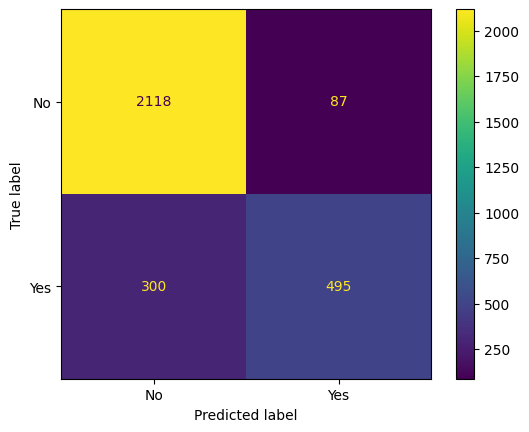

Training accuracy: 0.8815714285714286
Test accuracy: 0.871


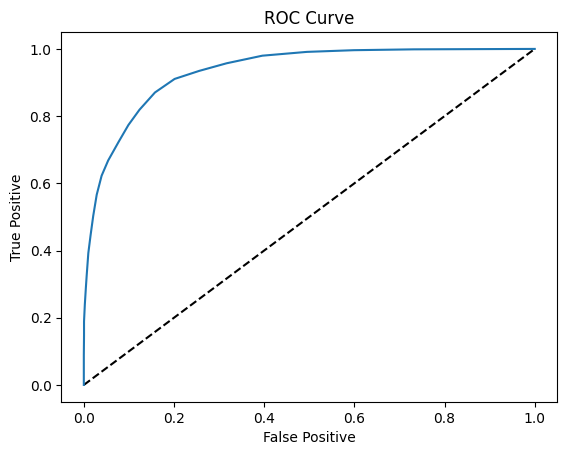

AUC score: 0.9335680771260286
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2205
         1.0       0.85      0.62      0.72       795

    accuracy                           0.87      3000
   macro avg       0.86      0.79      0.82      3000
weighted avg       0.87      0.87      0.86      3000



In [252]:
# Perform KNN using the value from the above grid search
KNN = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
# Fit to the training data
KNN.fit(X_train, y_train.values.ravel())
# Generate y_pred array for model's confusion matrix
y_pred = KNN.predict(X_test)

#Generate a confusion matrix of the reduced logistic regression model's predictions on a randomly selected, but consistent, 30% sample size of our total dataset.
print('Confusion Matrix:')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                #display_labels=KNN.classes_
                                display_labels=['No', 'Yes'])
disp.plot()
plt.show()
#ConfusionMatrixDisplay code adapted from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

print('Training accuracy: ' +  str(KNN.score(X_train, y_train)))
print('Test accuracy: ' +  str(KNN.score(X_test, y_test)))

# Generate AUC score and print
y_prob = KNN.predict_proba(X_test)[:, 1]

false_pos = roc_curve(y_test, y_prob)[0]
true_pos = roc_curve(y_test, y_prob)[1]
TH = roc_curve(y_test, y_prob)[2]

plt.title('ROC Curve')
plt.plot(KNN.classes_, KNN.classes_, 'k--')
plt.plot(false_pos, true_pos)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.show()

print('AUC score: ' + str(roc_auc_score(y_test, y_prob)))
print(classification_report(y_test, y_pred))

### E1: ACCURACY AND AUC

First, by organizing the correct and incorrect guesses of our Yes and No values, we can generate a visual representation of the testing results called a confusion matrix. This visual will allow us to see how often our model was correct in its classification of each value. In addition, we can also calculate the model's accuracy score by dividing the number of test observations it correctly classified against the total number of observations in the testing set (Larose & Larose, 2019, p. 99). In our analysis, The total number of observations in the testing dataset was 3,000 (with 7,000 being the size of the training dataset). Of these observations, the model correctly classified 2613 of them, giving it an overall accuracy score of .871, or 87.1%. However, we can also see from our confusion matrix and classification report that our model performed far better when classifying ‘No’ values, correctly classifying 2118 of 2205 (96%), than it did classifying ‘Yes’ values, where it correctly guessed 495 of 795 (62%). 

Our receiver operating characteristic (ROC) plot gives us a visual representation of true positives vs false positives at various prediction cutoffs in our model (Bruce et al., 2020, p. 224). The dotted line represents the results generated from a random classifier, effectively equalizing the rates of true and false positives. The blue line, on the other hand, represents the performance of our KNN classifier based on its true positive rate (TPR) and false positive rate (FPR). What we generally want to see is a ROC that creates a curve pulled toward the upper left quadrant of the chart, which indicates that the model has a high TPR and a low FPR. In our own analysis, we can observe this on the ROC plot.

Another result to consider is the area under curve (AUC) calculation for our ROC. Because an optimal ROC hugs the top left quadrant as closely as possible, we can determine the overall performance of a classifier model across all thresholds by calculating the area underneath the curve on the plot. A perfect model will return a value of 1, a random classifier will return a value of .5, and a model that performs worse than a random classifier will return a value below .5, with a theoretical minimum of 0. Our model generated an AUC calculation of .93.

### E2: RESULTS AND IMPLICATIONS

The results of the analysis are fairly clear: in terms of accuracy, our KNN classifier only outperformed a logistic regression model by 0.13%. The difference is negligible, implying that although it was effective as a classifier and drastically outperformed a random classifier, future improvements to the model should focus on rectifying its various limitations rather than exploring completely different types of classifiers. 

### E3: LIMITATION

Having already discussed the limitations of class imbalance in my logistic regression analysis, I want to describe a much more fundamental mechanical limitation of our analysis in the context of maximizing accuracy in a KNN model. As we described in section B1, a KNN classifier searches for nearest neighbors to the input observation by calculating Euclidean distance between the observations. But what is that calculation?

In English, it is calculated first by squaring the difference between each individual feature of the observations being compared, summing those squares, and then calculating the square root of that value. This sounds appropriate on the surface, as we will have normalized all of our data to adhere to the same scale between 0 and 1.

The issue with this approach is that our analysis is mixing natively continuous and categorical data. When normalized, a continuous feature will express a large range of values between 0 and 1. When a difference is calculated for these features, the result will always be a decimal value. When you square a decimal value, the result is a smaller decimal. So in our Euclidean distance calculation, we square each decimal difference, which returns a smaller decimal. We do this for every feature and sum those smaller decimals, then calculate the square root of that sum. If the sum is a decimal, its square root will be a larger decimal that is still below 1. If the sum is above 1, its square root will be a smaller value that is still above 1.

However, our binary categorical features and one-hot encoded features are only expressible as 0 or 1. This means that if there is a difference between the compared observations in one of these features, the difference will always be 1. 1 squared is also 1. This means that the effective weight of differences in categorical features is dramatically higher than differences in continuous features using this distance calculation. This is why Euclidean distance is not considered to be an appropriate metric for comparing categorical features. Instead, metrics for this type of comparison such as Jaccard or Hamming distance might be used, both of which are included in sklearn's implementation alongside Euclidean distance. The issue is that we have mixed data types in our analysis, which means that neither metric is actually appropriate since both numeric and categorical data are present. Ideally, a metric designed specifically to handle mixed data types such as Gower’s distance would be used, but this metric is not computationally streamlined enough for inclusion in sklearn’s list of distance metrics. Unfortunately, the development and implementation of this metric for inclusion in our analysis falls outside the scope of this assignment.

Because of this limitation, we are almost certainly biasing the model to favor consistent categorical values in neighbor selection instead of exploring the nuances of our included continuous features and the true nature of their relationships with our Churn classes.


### E4: COURSE OF ACTION

Based on the results of the analysis and the limitations identified through the exploration of this feature, I cannot recommend that the organization implement the model for the purposes of accurately identifying customers likely to churn for the purposes of early intervention. The model does not significantly improve over logistic regression, and features a much higher accuracy score among non-churned customers than churned customers.

Instead, I have two primary recommendations for the organization if they wish to further optimize the accuracy of this model. First, since an appropriate distance metric for locating neighbors with mixed data types does not currently exist within sklearn’s toolset, the organization should consider investing in development of an optimized Gower distance calculation that could return distance matrixes across all values of this dataset. The resulting matrixes could then be imported and used directly in our KNN function, as our classifier function does have the ability to use precomputed matrixes rather than generative functions.

Second, I recommend that the organization begin to explore strategies to address class imbalance in the Churn variable to equalize the accuracy scores across its class predictions and improve its relatively low score of 62% across churned customers. This could normally be accomplished by adjusting the prediction cutoffs in the KNN model itself, but sklearn curiously does not feature this functionality for its KNN classifier models, meaning the feature would either need to be developed, or alternative methods employed such as oversampling, undersampling, and data generation via generative adversarial networks or synthetic minority oversampling.


### F: PANOPTO DEMONSTRATION

A brief demonstration video of this code, including a description of the software environment used to develop it, has been recorded via Panopto and submitted for evaluation in conjunction with this Jupyter notebook per instructions in the WGU submission portal.

The software used in the production of this code is as follows:

Operating System: Windows 11 Home<br>
Code Editor and Integrated Development Environment: Microsoft Visual Studio Code<br>
Browser used for research and submission: Google Chrome<br>
Spreadsheet editor: Microsoft Excel

### G: SOURCES OF THIRD PARTY CODE

SciKitLearn-developers. (2007-2023). Sklearn.neighbors.KNeighborsClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

SciKitLearn-developers. (2007-2023). Sklearn.feature_selection.SelectKBest. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html.

SciKitLearn-developers. (2007-2023). Sklearn.metrics.ConfusionMatrixDisplay. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html.

SciKitLearn-developers. (2007-2023). Sklearn.model_selection.GridSearchCV. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

### H: SOURCES

Band, A. (2020). How to find the optimal value of K in KNN? https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists : 50+ essential concepts using r and python. O'Reilly Media, Incorporated.

Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. ISBN-13: 978-1-119-52684-1.